# Object_Detection_From_Images 

## 1. Import Libraries

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

### 1.1 Import Matplotlib to plot image
### 1.2 Import PIL (pillow) to work with images

In [18]:
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

### 1.3 Import utils to create Lables

In [17]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 2. Download SSD_MOBILENET 

In [6]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

### 2.1 Path to frozen detection graph. This is the actual model that is used for the object detection.

In [7]:
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

In [8]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

In [9]:
NUM_CLASSES = 90

In [10]:
# ## Download Model

if not os.path.exists(MODEL_NAME + '/frozen_inference_graph.pb'):
	print ('Downloading the model')
	opener = urllib.request.URLopener()
	opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
	tar_file = tarfile.open(MODEL_FILE)
	for file in tar_file.getmembers():
	  file_name = os.path.basename(file.name)
	  if 'frozen_inference_graph.pb' in file_name:
	    tar_file.extract(file, os.getcwd())
	print ('Download complete')
else:
	print ('Model already exists')

Model already exists


In [11]:
# ## Load a (frozen) Tensorflow model into memory.

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [12]:
# ## Loading label map

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [13]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

## For the sake of simplicity we will use only 3 images:
### image1.jpg
### image2.jpg
### image3.jpg
### If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.

In [20]:


PATH_TO_TEST_IMAGES_DIR = 'C:/Users/11010853.SRHK/Pictures/Object_Detection/test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4) ]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
#C:\Users\11010853.SRHK\PycharmProjects\object_recognition_detection\test_images
# Running the tensorflow session


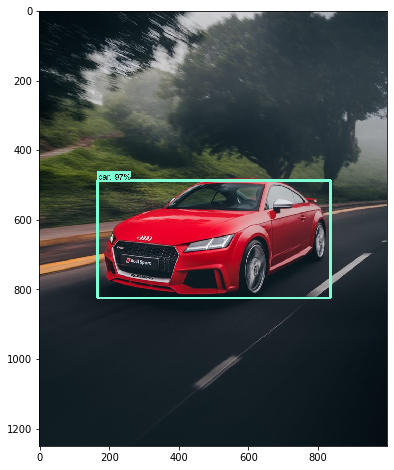

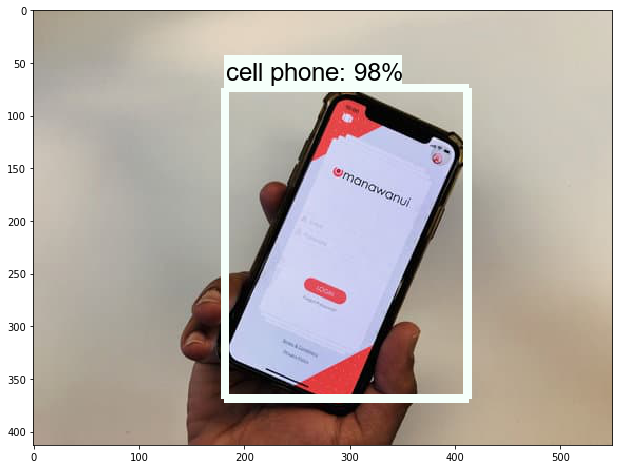

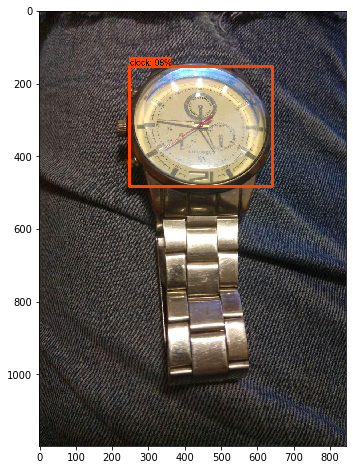

In [24]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)
      plt.show()